### Soal 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil data dari file JSON
json = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"
data = pd.read_json(json)
df = pd.DataFrame(data)
df

,transaction_id,transaction_date,customer_name,transaction_amount,item_category,item_name,payment_method,status
0,1,01-11-2023,John Doe,50.0,book,The Great Gatsby,credit card,success
1,2,01-11-2023,Jane Smith,120.5,gaming,PlayStation 5,cash,success
2,3,02-11-2023,Bob Johnson,800.0,technology,Laptop,credit card,failed
3,4,03-11-2023,Alice Williams,30.0,kitchen,Coffee Maker,e wallet,success
4,5,03-11-2023,Charlie Brown,150.0,book,To Kill a Mockingbird,credit card,success
...,...,...,...,...,...,...,...,...
95,96,21-12-2023,Oliver Brown,15.0,kitchen,Peeler,credit card,success
96,97,21-12-2023,Chloe Wilson,75.5,book,The Road,credit card,success
97,98,22-12-2023,Ella Harris,30.0,gaming,Board Game: Monopoly,cash,success
98,99,22-12-2023,Liam Turner,180.0,technology,Bluetooth Earbuds,e wallet,success


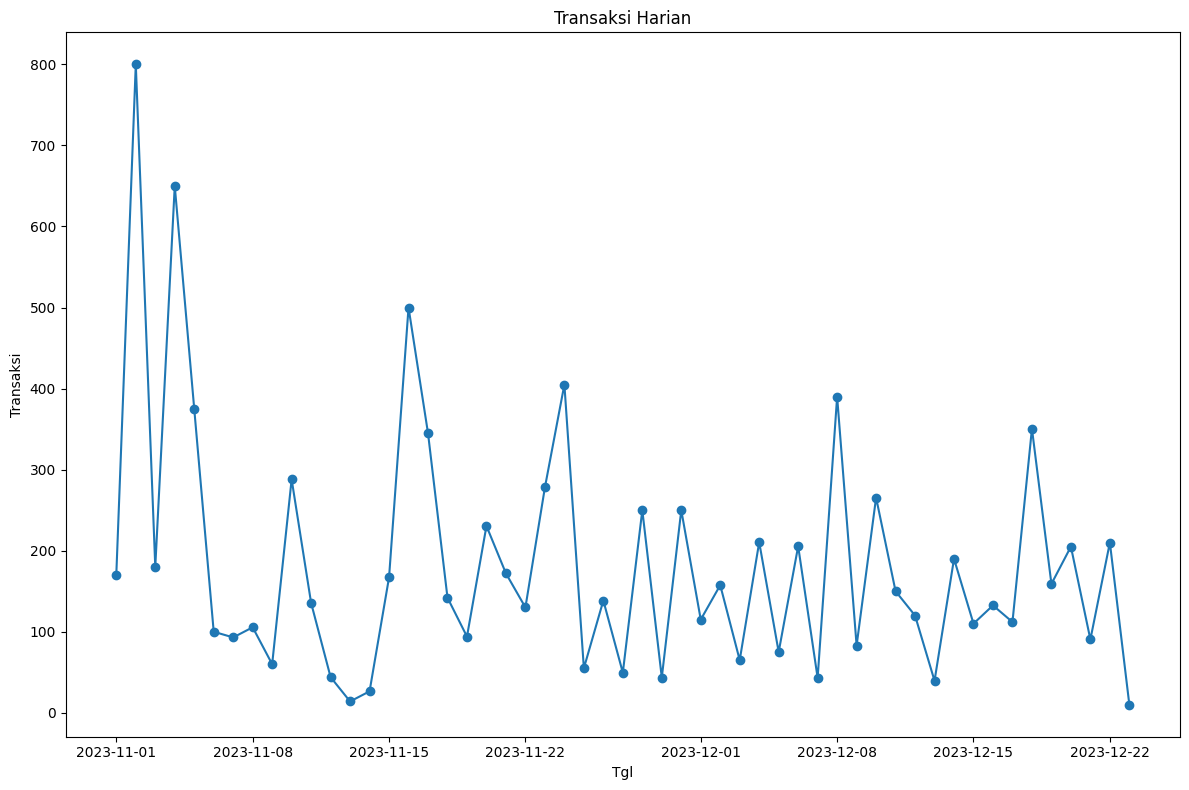

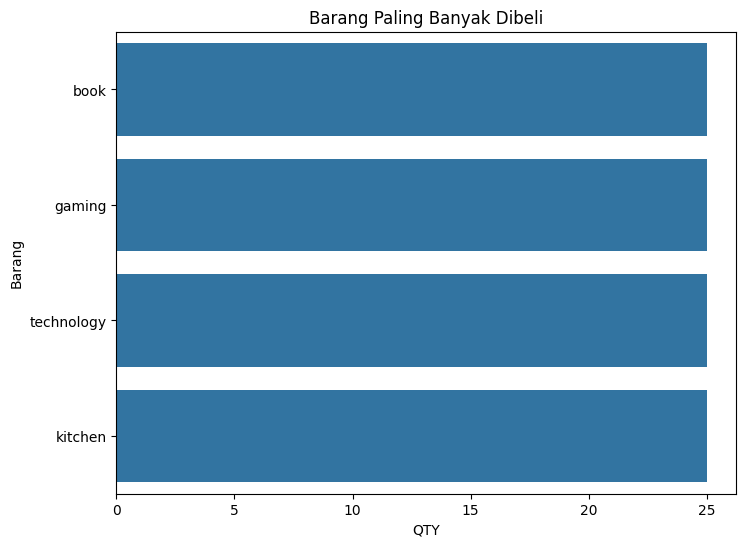

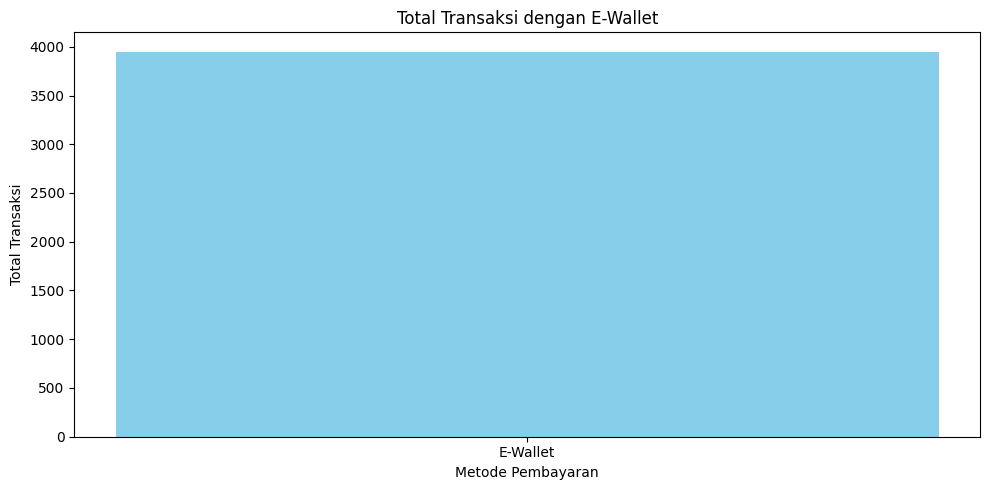

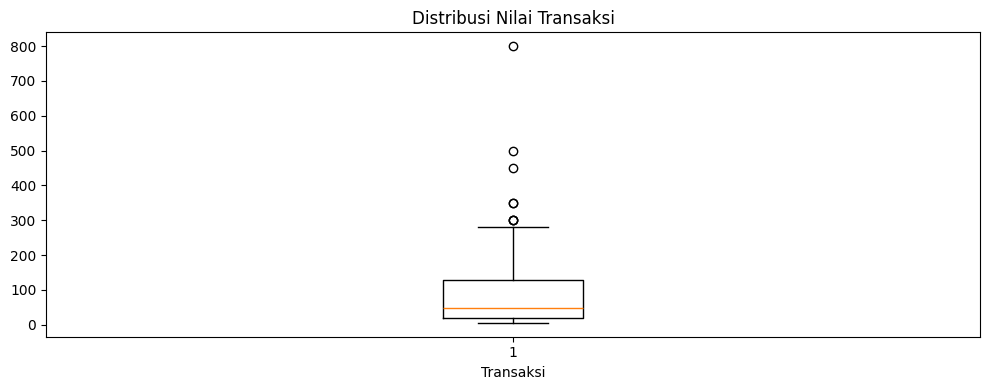

In [8]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

plt.figure(figsize=(12, 8))
daily_total = df.groupby(df['transaction_date'].dt.floor('D'))['transaction_amount'].sum()
plt.plot(daily_total, marker='o')
plt.title('Transaksi Harian')
plt.xlabel('Tgl')
plt.ylabel('Transaksi')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(y='item_category', data=df, order=df['item_category'].value_counts().index)
plt.title('Barang Paling Banyak Dibeli')
plt.xlabel('QTY')
plt.ylabel('Barang')
plt.show()

ewallet_transactions = df[df['payment_method'] == 'e wallet']
total_ewallet_transactions = ewallet_transactions['transaction_amount'].sum()

total_transactions_by_method = df.groupby('payment_method')['transaction_amount'].sum()

plt.figure(figsize=(10, 5))
plt.bar("E-Wallet", total_ewallet_transactions, color='skyblue')
plt.title('Total Transaksi dengan E-Wallet')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Transaksi')
plt.tight_layout()
plt.show()

max_value = df['transaction_amount'].max()
min_value = df['transaction_amount'].min()
median_value = df['transaction_amount'].median()

plt.figure(figsize=(10, 4))
plt.boxplot(df['transaction_amount'])
plt.title('Distribusi Nilai Transaksi')
plt.xlabel('Transaksi')
plt.tight_layout()
plt.show()

### Soal. 2

In [9]:
data_csv = "survey.csv"
data_survey = pd.read_csv(data_csv)
df_survey = pd.DataFrame(data_survey)
df_survey

,name,age,favorite_front_end,favorite_back_end,salary_per_year_in_USD,company_type
0,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
1,Jane Smith,31-40,React,Java,more than 60000,fintech
2,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
3,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
4,Emily Davis,21-25,-,C#,10000 - 25000,edutech
...,...,...,...,...,...,...
74,Liam Harris,31-40,HTML/CSS,PHP,more than 60000,software house
75,Olivia Robinson,17-20,React,Node.js,26000 - 40000,freelance
76,Noah Rodriguez,21-25,Vue.js,Python,41000 - 60000,software house
77,Emma Lee,26-30,-,Java,10000 - 25000,government


In [10]:
df_survey.drop_duplicates()

,name,age,favorite_front_end,favorite_back_end,salary_per_year_in_USD,company_type
0,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
1,Jane Smith,31-40,React,Java,more than 60000,fintech
2,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
3,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
4,Emily Davis,21-25,-,C#,10000 - 25000,edutech
10,Sam Brown,-,Vue.js,Node.js,26000 - 40000,software house
11,Sophie White,21-25,React,Python,NaN,fintech
12,Chris Turner,17-20,JavaScript,NaN,41000 - 60000,edutech
13,Mia Green,26-30,Angular,Java,10000 - 25000,government
14,Liam Harris,31-40,HTML/CSS,PHP,more than 60000,software house


In [11]:
cleaned_df = df_survey.dropna(subset=['favorite_back_end', 'salary_per_year_in_USD'])

cleaned_df = cleaned_df[cleaned_df['age'] != "-"]

cleaned_df = cleaned_df[cleaned_df['favorite_front_end'] != "-"]

cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df

,name,age,favorite_front_end,favorite_back_end,salary_per_year_in_USD,company_type
0,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
1,Jane Smith,31-40,React,Java,more than 60000,fintech
2,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
3,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
4,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
5,Jane Smith,31-40,React,Java,more than 60000,fintech
6,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
7,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
8,Mia Green,26-30,Angular,Java,10000 - 25000,government
9,Liam Harris,31-40,HTML/CSS,PHP,more than 60000,software house


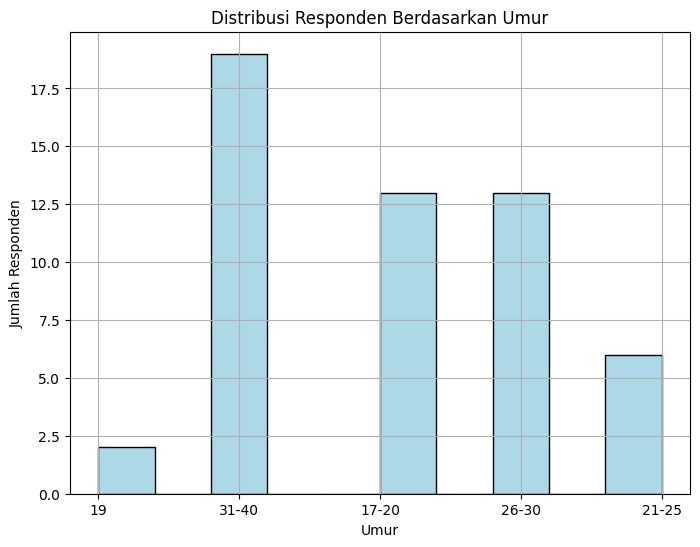

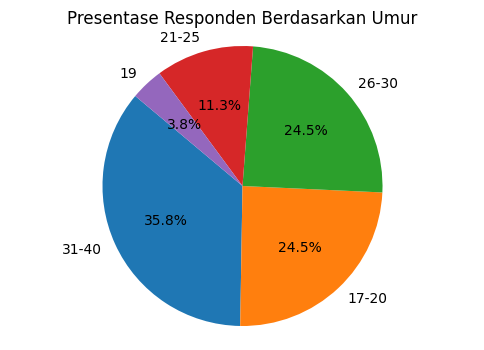

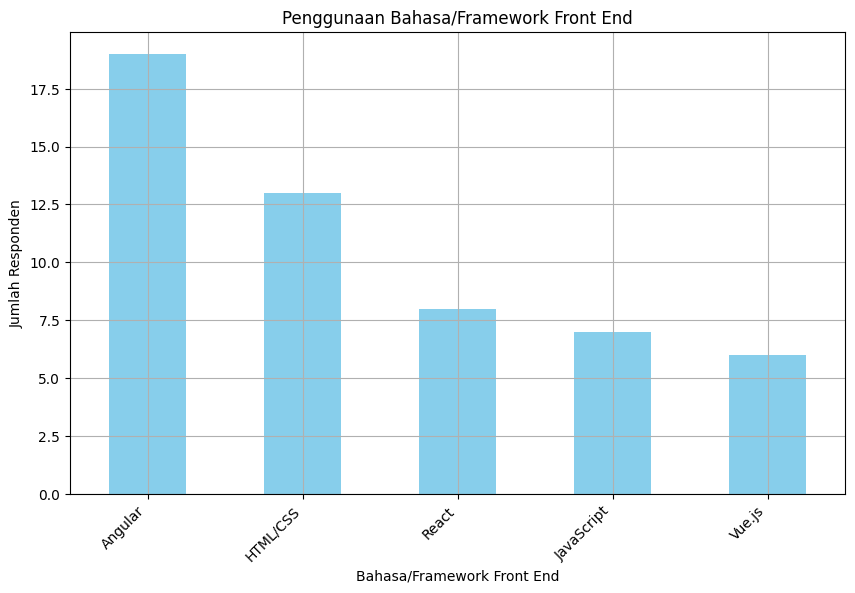

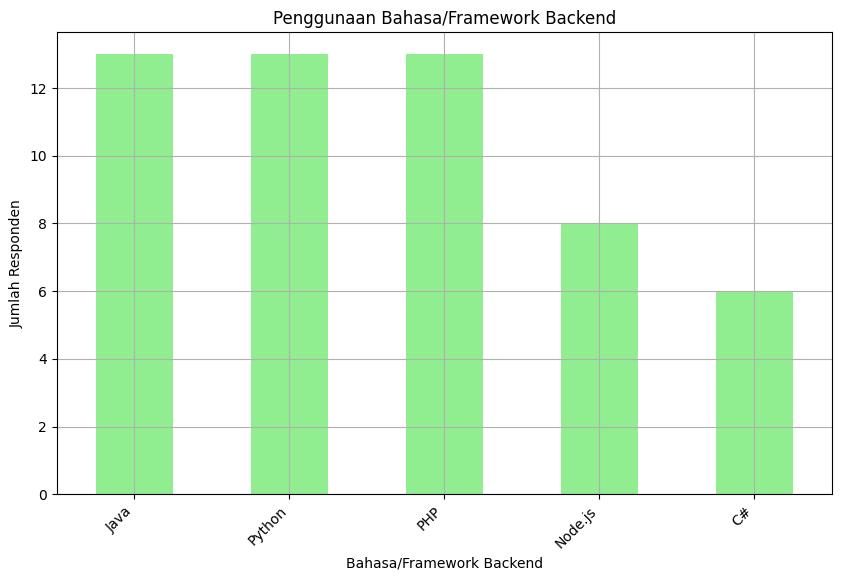

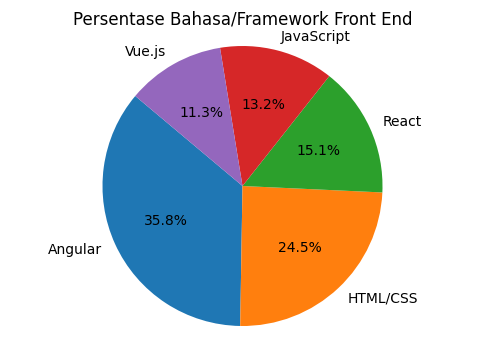

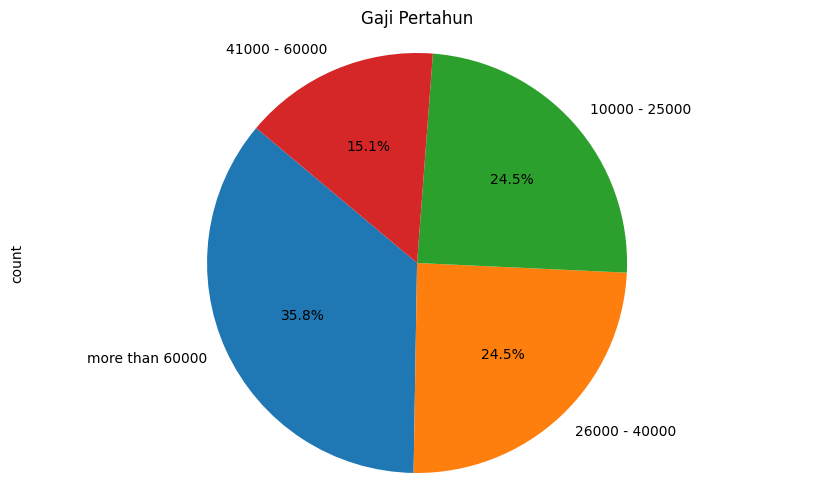

In [22]:
# Menghitung jumlah responden berdasarkan umur
age_counts = cleaned_df['age'].value_counts()

# Histogram: Distribusi responden berdasarkan umur
plt.figure(figsize=(8, 6))
plt.hist(cleaned_df['age'], bins=10, color='lightblue', edgecolor='black')
plt.title('Distribusi Responden Berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah Responden')
plt.grid(True)
plt.show()

# Pie chart: Presentase responden berdasarkan umur
plt.figure(figsize=(6, 4))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Presentase Responden Berdasarkan Umur')
plt.axis('equal')
plt.show()

# Bar plot: Penggunaan bahasa/framework front end
plt.figure(figsize=(10, 6))
cleaned_df['favorite_front_end'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Bahasa/Framework Front End')
plt.ylabel('Jumlah Responden')
plt.title('Penggunaan Bahasa/Framework Front End')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Bar plot: Penggunaan bahasa/framework backend
plt.figure(figsize=(10, 6))
cleaned_df['favorite_back_end'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Bahasa/Framework Backend')
plt.ylabel('Jumlah Responden')
plt.title('Penggunaan Bahasa/Framework Backend')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Pie chart: Persentase bahasa/framework front end
plt.figure(figsize=(6, 4))
plt.pie(cleaned_df['favorite_front_end'].value_counts(), labels=cleaned_df['favorite_front_end'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Bahasa/Framework Front End')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 6))
cleaned_df['salary_per_year_in_USD'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gaji Pertahun')
plt.axis('equal')  # Memastikan lingkaran terlihat seperti lingkaran
plt.show()